In [193]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


In [154]:
import pandas as pd

In [189]:
df = pd.read_csv('raw_house_data.csv')

In [190]:
# Now let's check for missing data 

In [191]:

# Check for NaN in the entire data

In [192]:
value = df.isnull().values.any()


In [193]:
print(value)

True


In [194]:
# Counte NaN on entire DataFrame
result = df.isnull().sum()
print(result)

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64


In [195]:
#check the index of rows with no values
out = df[df['lot_acres'].isnull()].index.tolist()
print(out)
out1 = df[df['fireplaces'].isnull()].index.tolist()
print(out1)



[967, 1659, 2564, 2939, 3420, 3530, 4173, 4286, 4365, 4783]
[967, 1659, 1729, 1730, 1863, 2025, 2357, 2635, 2766, 2876, 2917, 2932, 2939, 3108, 3420, 3529, 3556, 3647, 3822, 4173, 4286, 4365, 4724, 4783, 4812]


In [196]:
print(df.describe())

                MLS    sold_price       zipcode    longitude     latitude  \
count  5.000000e+03  5.000000e+03   5000.000000  5000.000000  5000.000000   
mean   2.127070e+07  7.746262e+05  85723.025600  -110.912107    32.308512   
std    2.398508e+06  3.185556e+05     38.061712     0.120629     0.178028   
min    3.042851e+06  1.690000e+05  85118.000000  -112.520168    31.356362   
25%    2.140718e+07  5.850000e+05  85718.000000  -110.979260    32.277484   
50%    2.161469e+07  6.750000e+05  85737.000000  -110.923420    32.318517   
75%    2.180480e+07  8.350000e+05  85749.000000  -110.859078    32.394334   
max    2.192856e+07  5.300000e+06  86323.000000  -109.454637    34.927884   

         lot_acres         taxes  year_built     bedrooms   fireplaces  
count  4990.000000  5.000000e+03  5000.00000  5000.000000  4975.000000  
mean      4.661317  9.402828e+03  1992.32800     3.933800     1.885226  
std      51.685230  1.729385e+05    65.48614     1.245362     1.136578  
min       0.00

In [197]:
# drop all rows that have missing values
df=df.dropna()
#df.mask(df.eq('None')).dropna()

In [198]:
result = df.isnull().sum()
print(result)

MLS                 0
sold_price          0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
dtype: int64


In [199]:
# count number of none 
print('sqrt_ft:', sum(df['sqrt_ft'] == 'None'))
print('garage:', sum(df['garage'] == 'None'))
print('bathrooms:', sum(df['bathrooms'] == 'None'))
print('floor_covering:',sum(df['floor_covering'] == 'None'))
print('kitchen_features:',sum(df['kitchen_features'] == 'None'))
print('year_built:',sum(df['year_built'] == 'None'))
print('bedrooms:',sum(df['bedrooms'] == 'None'))
print('taxes:',sum(df['taxes'] == 'None'))
print('lot_acres:',sum(df['lot_acres'] == 'None'))
print('HOA:',sum(df['HOA'] == 'None'))
print('longitude:',sum(df['longitude'] == 'None'))
print('latitude:',sum(df['latitude'] == 'None'))
print('MLS:',sum(df['MLS'] == 'None'))
print('sold_price:',sum(df['sold_price'] == 'None'))
print('zip_code:',sum(df['zipcode'] == 'None'))
print('fire_place:',sum(df['fireplaces'] == 'None'))

sqrt_ft: 29
garage: 7
bathrooms: 0
floor_covering: 0
kitchen_features: 32
year_built: 0
bedrooms: 0
taxes: 0
lot_acres: 0
HOA: 556
longitude: 0
latitude: 0
MLS: 0
sold_price: 0
zip_code: 0
fire_place: 0


In [200]:
value = df.isnull().values.any()
print(value)

False


In [201]:
#replace None with 0 in the following columns
df['garage'].replace('None', 0, inplace=True) # The building might be a commercial building hence it has no garage
df['bathrooms'].replace('None', 0, inplace=True) # The buikding might be a commercial building hence it has no bathroom
df['HOA'].replace('None', 0, inplace=True) # the building might not have a HOA, hence no value

In [202]:
#now we delete rows with None
df=df.mask(df.eq('None')).dropna()


In [203]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4,6842,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422


In [204]:
print(df.describe())

                MLS    sold_price       zipcode    longitude     latitude  \
count  4.912000e+03  4.912000e+03   4912.000000  4912.000000  4912.000000   
mean   2.147728e+07  7.760996e+05  85724.167142  -110.910777    32.315079   
std    1.424469e+06  3.165812e+05     36.805409     0.120647     0.168394   
min    4.110917e+06  3.000000e+05  85118.000000  -112.520168    31.356362   
25%    2.141000e+07  5.850000e+05  85718.000000  -110.978365    32.280354   
50%    2.161743e+07  6.781000e+05  85737.000000  -110.922394    32.319142   
75%    2.180548e+07  8.400000e+05  85750.000000  -110.858460    32.396254   
max    2.192856e+07  5.300000e+06  86323.000000  -109.454637    34.927884   

         lot_acres         taxes   year_built     bedrooms   fireplaces  
count  4912.000000  4.912000e+03  4912.000000  4912.000000  4912.000000  
mean      4.242895  9.452678e+03  1992.239210     3.929357     1.880090  
std      45.969378  1.744797e+05    66.023857     1.143046     1.132477  
min       

In [205]:
len(df)

4912

In [206]:
#Here we create a function called count_number that counts the number of elements listed in a string
def count_number(string):
  result = len(string.split(','))
  return result

In [207]:
# Let's create a new feature number of kitchen features that counts the number of kitchen features
df['number_of_kitchen_feat'] = df['kitchen_features'].map(count_number)

In [208]:
# Let's create a new feature number of floor_covering that counts the number of floor coverings

df['number_of_floor_covering'] = df['floor_covering'].map(count_number)


In [209]:
def remove_comma_from_number(string):
  if type(string) == str and ',' in string:
    out = string.replace(',','')
    return out
  else:
    return string

In [210]:
# Here we remove comma from numbers. Eg 20,000-->> 20000
df['HOA'] = df['HOA'].map(remove_comma_from_number)


In [211]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,number_of_kitchen_feat,number_of_floor_covering
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0,4,2
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0,2,2
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",0,4,3
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55,5,2
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4,6842,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422,5,3


In [212]:
#convert float points to integer in count variables e.g bedrooms
df['bedrooms'] = df['bedrooms'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(float)
df['fireplaces'] = df['bathrooms'].astype(int)
df['garage'] = df['garage'].astype(float)
df['HOA'] = df['HOA'].astype(float)

In [213]:
# Let's create a new feature that stores the count of the total number of features in the house

df['total_num_feat'] = df['bedrooms']+ df['bathrooms']+ df['garage']+ df['fireplaces']+df['number_of_kitchen_feat']+ df['number_of_floor_covering']

In [214]:
# Let's remove kitchen_features and floor_covering colunms
df = df.drop('kitchen_features', axis=1)
df = df.drop('floor_covering', axis=1)



In [215]:
#!pip install plotly_express
import plotly_express as px

In [216]:
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="year_built", zoom=1)

In [217]:
# This function calculates the eucledian distance between 2 points
from scipy.spatial import distance
def fxy(a, b):
    return distance.euclidean(a, b)

# Sedona

Sedona is a town in central Arizona, located about 30 miles south of the city of Flagstaff. The area is famous for its truly beautiful scenic view of the neighboring red rocks and national parks. Sedona is a very popular center of music and culture, with a number of annual events like St. Patrick's Parade, Sedona Bluegrass Festival, Sedona Marathon, and Sedona International Film Festival. Flagstaff Pulliam Airport is located about 26 miles away from the town. There are numerous hiking areas in the town such as Sedona Airport Loop Trail, Cow Pies Trailhead, Chapel Trail, Adobe Jack Trailhead, Little Horse Trailhead, Cathedral Rock Trailhead, and so on. Other attractions in the town include Tlaquepaque Arts & Shopping Village, Sedona Artist Market, Rowe Fine Art Gallery, and Chapel of the Holy Cross.

In [218]:
# Here we create a new feature which is the distance between the most expensive area to live in Arizona and the coordinates of each house 
df['distance_to_sedona'] = df.apply(lambda x: fxy([x['latitude'], x['longitude']], [34.871002, -111.760826]), axis=1)


In [219]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,number_of_kitchen_feat,number_of_floor_covering,total_num_feat,distance_to_sedona
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500,0.0,10,0.0,4,2,39.0,3.776817
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300,0.0,2,0.0,2,2,10.0,3.353986
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019,4.0,5,0.0,4,3,28.0,3.305587
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396,3.0,6,55.0,5,2,26.0,2.753813
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842,3.0,4,422.0,5,3,22.0,2.670857


In [220]:
print(df.describe())

                MLS    sold_price       zipcode    longitude     latitude  \
count  4.912000e+03  4.912000e+03   4912.000000  4912.000000  4912.000000   
mean   2.147728e+07  7.760996e+05  85724.167142  -110.910777    32.315079   
std    1.424469e+06  3.165812e+05     36.805409     0.120647     0.168394   
min    4.110917e+06  3.000000e+05  85118.000000  -112.520168    31.356362   
25%    2.141000e+07  5.850000e+05  85718.000000  -110.978365    32.280354   
50%    2.161743e+07  6.781000e+05  85737.000000  -110.922394    32.319142   
75%    2.180548e+07  8.400000e+05  85750.000000  -110.858460    32.396254   
max    2.192856e+07  5.300000e+06  86323.000000  -109.454637    34.927884   

         lot_acres         taxes   year_built     bedrooms    bathrooms  \
count  4912.000000  4.912000e+03  4912.000000  4912.000000  4912.000000   
mean      4.242895  9.452678e+03  1992.239210     3.929357     3.818709   
std      45.969378  1.744797e+05    66.023857     1.143046     1.310353   
min   

In [221]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,garage,fireplaces,HOA,number_of_kitchen_feat,number_of_floor_covering,total_num_feat,distance_to_sedona
MLS,1.000000,0.007846,0.182707,0.076983,0.334183,-0.042798,0.002477,0.008217,-0.042718,-0.057615,0.017049,-0.047174,-0.005520,0.037277,0.040618,-0.004710,-0.302041
sold_price,0.007846,1.000000,-0.054058,-0.039408,0.027966,0.300681,0.023462,-0.013481,0.131034,0.354750,0.100601,0.354707,0.164133,0.036784,0.063849,0.272365,-0.036788
zipcode,0.182707,-0.054058,1.000000,0.028260,0.405637,-0.129891,-0.002002,0.041856,0.051663,-0.050455,0.088316,-0.048498,-0.016509,-0.021065,0.038438,0.000370,-0.348071
longitude,0.076983,-0.039408,0.028260,1.000000,-0.302069,0.156214,-0.001152,-0.008366,0.065167,0.020585,-0.036284,0.021376,-0.018772,-0.012429,0.054998,0.018223,0.521173
latitude,0.334183,0.027966,0.405637,-0.302069,1.000000,-0.201668,0.000154,0.087880,-0.107652,-0.073821,0.070115,-0.069979,0.041553,-0.011046,0.016126,-0.049717,-0.961401
lot_acres,-0.042798,0.300681,-0.129891,0.156214,-0.201668,1.000000,-0.000736,-0.044736,0.093483,0.065941,-0.060433,0.065615,-0.009929,-0.049362,0.003807,0.012521,0.233621
taxes,0.002477,0.023462,-0.002002,-0.001152,0.000154,-0.000736,1.000000,0.000065,0.005202,0.009055,0.005615,0.009073,0.004778,-0.004717,-0.000342,0.004432,-0.000727
year_built,0.008217,-0.013481,0.041856,-0.008366,0.087880,-0.044736,0.000065,1.000000,-0.087018,-0.066054,0.106583,-0.066048,0.015947,0.034298,-0.030710,-0.013213,-0.083817
bedrooms,-0.042718,0.131034,0.051663,0.065167,-0.107652,0.093483,0.005202,-0.087018,1.000000,0.644686,0.059545,0.644861,-0.059694,-0.014178,0.123836,0.592704,0.116014
bathrooms,-0.057615,0.354750,-0.050455,0.020585,-0.073821,0.065941,0.009055,-0.066054,0.644686,1.000000,0.118388,0.999838,0.001448,0.000578,0.119956,0.720275,0.072786


In [223]:
# lets do some satter plots to see the behaviour of data
from matplotlib import pyplot as plt

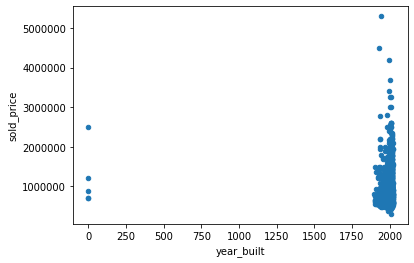

In [224]:
df.plot(kind = 'scatter', x = 'year_built', y = 'sold_price')

plt.show()

Makes no sense to have zero year, hence we have to delete the row that has and zero year.

In [225]:
df = df[df['year_built'] != 0]
print(len(df))

4907


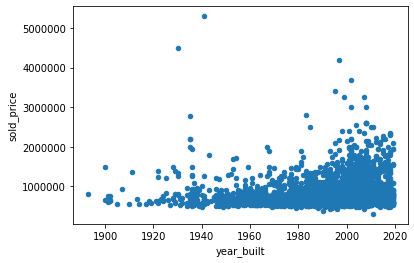

In [226]:
df.plot(kind = 'scatter', x = 'year_built', y = 'sold_price')

plt.show()

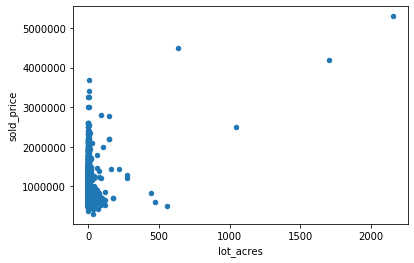

In [227]:
df.plot(kind = 'scatter', x = 'lot_acres', y = 'sold_price')

plt.show()

In [228]:
df = df[df['lot_acres'] != 0]
print(len(df))

4872


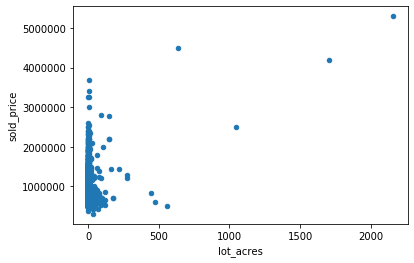

In [229]:
df.plot(kind = 'scatter', x = 'lot_acres', y = 'sold_price')

plt.show()

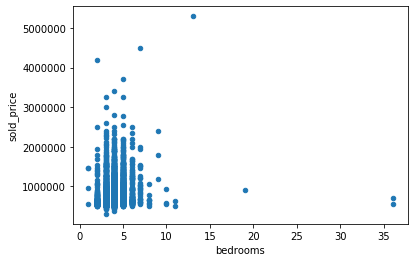

In [230]:
df.plot(kind = 'scatter', x = 'bedrooms', y = 'sold_price')

plt.show()

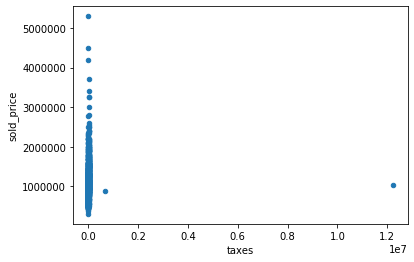

In [231]:
df.plot(kind = 'scatter', x = 'taxes', y = 'sold_price')

plt.show()

In [232]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,number_of_kitchen_feat,number_of_floor_covering,total_num_feat,distance_to_sedona
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500,0.0,10,0.0,4,2,39.0,3.776817
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300,0.0,2,0.0,2,2,10.0,3.353986
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019,4.0,5,0.0,4,3,28.0,3.305587
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396,3.0,6,55.0,5,2,26.0,2.753813
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842,3.0,4,422.0,5,3,22.0,2.670857


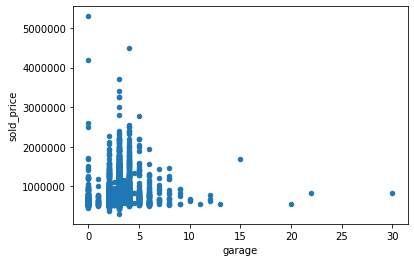

In [233]:
df.plot(kind = 'scatter', x = 'garage', y = 'sold_price')

plt.show()

In [234]:
type(df.garage[0])

numpy.float64

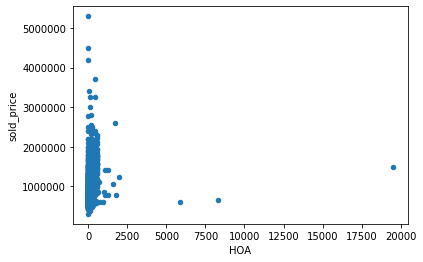

In [235]:
df.plot(kind = 'scatter', x = 'HOA', y = 'sold_price')

plt.show()

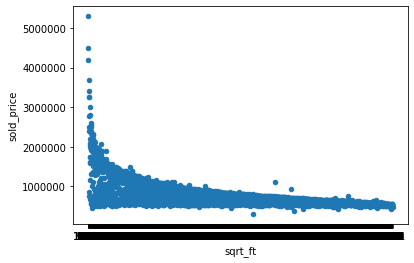

In [236]:
df.plot(kind = 'scatter', x = 'sqrt_ft', y = 'sold_price')

plt.show()

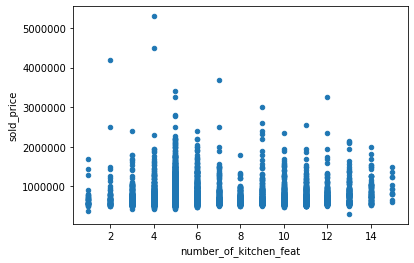

In [237]:
df.plot(kind = 'scatter', x = 'number_of_kitchen_feat', y = 'sold_price')

plt.show()

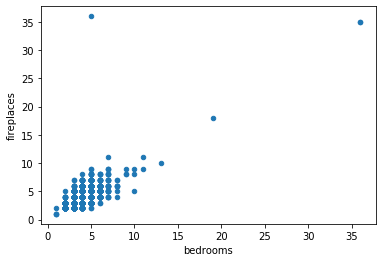

In [238]:
df.plot(kind = 'scatter', x = 'bedrooms', y = 'fireplaces')

plt.show()

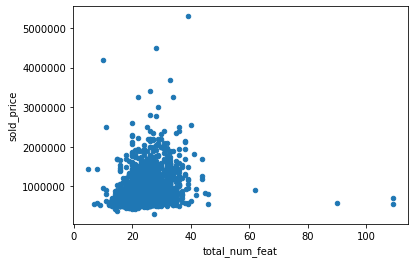

In [239]:
df.plot(kind = 'scatter', x = 'total_num_feat', y = 'sold_price')

plt.show()

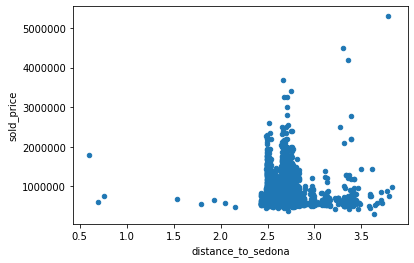

In [240]:
df.plot(kind = 'scatter', x = 'distance_to_sedona', y = 'sold_price')

plt.show()


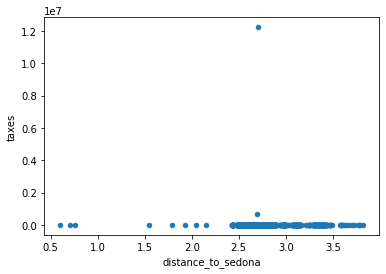

In [242]:
df.plot(kind = 'scatter', x = 'distance_to_sedona', y = 'taxes')

plt.show()


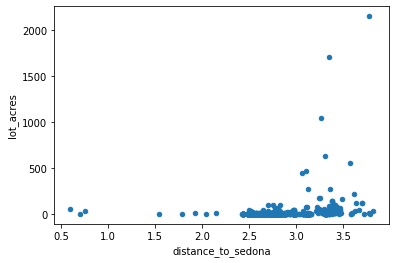

In [243]:
df.plot(kind = 'scatter', x = 'distance_to_sedona', y = 'lot_acres')

plt.show()


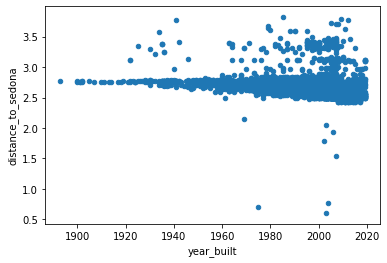

In [244]:
df.plot(kind = 'scatter', x = 'year_built', y = 'distance_to_sedona')

plt.show()


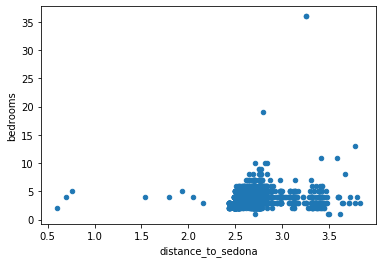

In [245]:
df.plot(kind = 'scatter', x = 'distance_to_sedona', y = 'bedrooms')

plt.show()


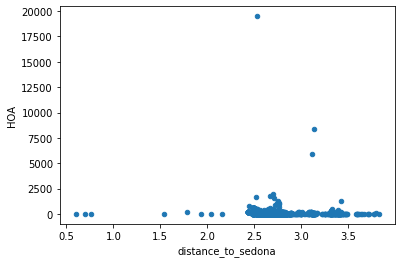

In [246]:
df.plot(kind = 'scatter', x = 'distance_to_sedona', y = 'HOA')

plt.show()